# Comparison between linear and quantile regression

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# function to generate data with a linear model and Cauchy noise
def generate_data(n, true_slope, true_intercept, cauchy_scale):
    x = np.linspace(0, 10, n)
    true_line = true_slope * x + true_intercept
    cauchy_noise = np.random.standard_cauchy(n) * cauchy_scale
    y = true_line + cauchy_noise
    return x, y

In [4]:
# function to fit a linear model using least squares
def fit_least_squares(x, y):
    A = np.vstack([x, np.ones_like(x)]).T
    slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]
    return slope, intercept

In [5]:
def fit_quantile_regression(x, y):
    quantile_reg = sm.QuantReg(y, sm.add_constant(x))
    result = quantile_reg.fit(q=0.5) # q=0.5 corresponds to median (50th percentile)
    return result.params

In [6]:
def plot():
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label = "Data with Cauchy noise", alpha=0.5, s=5)
    plt.plot(x, true_slope * x + true_intercept, color = 'red', label = 'True line')
    plt.plot(x, ls_slope * x + ls_intercept, color = 'green', label = 'Linear regression (mean, OLS)')
    plt.plot(x, quantile_slope * x + quantile_intercept, color = 'purple', label='Quantile regression (median, IRLS)')
    plt.legend()
    plt.ylim(-10, 40)
    plt.title('OLS vs. QR fit with Cauchy Noise')
    plt.show()


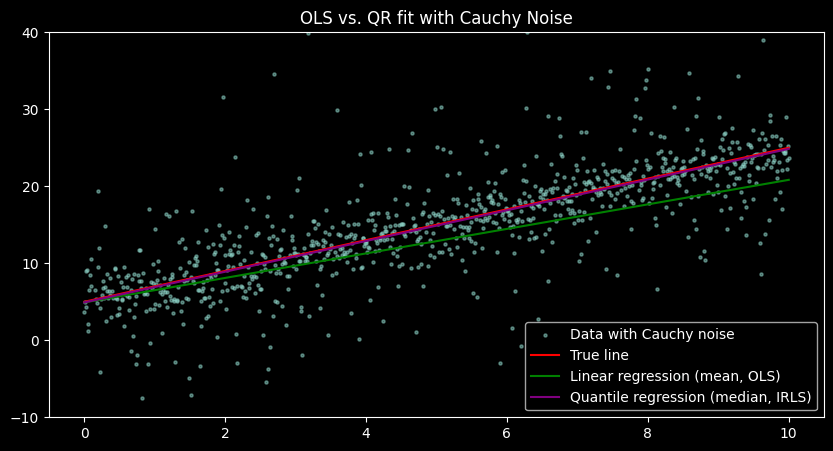

In [7]:
# True parameters of the linear model
true_slope = 2
true_intercept = 5
cauchy_scale = 2

# Generate data
x, y = generate_data(1000, true_slope, true_intercept, cauchy_scale)

# Fit a linear model using least squares
ls_slope, ls_intercept = fit_least_squares(x, y)

# fit a quantile regression
quantile_intercept, quantile_slope = fit_quantile_regression(x, y)

plot()